<a href="https://colab.research.google.com/github/AnanyaSharma2/data-analysis/blob/main/CarDataSet_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data analysis**
> EDA of data-set of cars from Kaggle
> To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df = pd.read_csv("/content/data.csv.zip")

In [69]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [70]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [72]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [73]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors','Vehicle Size' ], axis=1)


### **Removing the duplicates**

In [74]:
df.shape

(11914, 10)

In [75]:
df[df.duplicated()].shape

(989, 10)

In [76]:
df.drop_duplicates(inplace=True)

In [77]:
df.shape

(10925, 10)

In [78]:
df.count()

Make                 10925
Model                10925
Year                 10925
Engine HP            10856
Engine Cylinders     10895
Transmission Type    10925
Driven_Wheels        10925
highway MPG          10925
city mpg             10925
MSRP                 10925
dtype: int64

Removing null values

In [79]:
df.isnull().sum()  # df.isna().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

In [80]:
df.dropna(inplace=True)

In [81]:
df.shape

(10827, 10)

In [82]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
highway MPG          0
city mpg             0
MSRP                 0
dtype: int64

### **Detecting Outliers**

In [83]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
highway MPG            int64
city mpg               int64
MSRP                   int64
dtype: object

<Axes: xlabel='MSRP'>

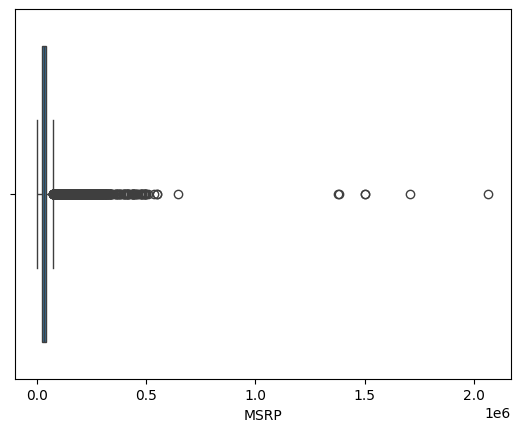

In [84]:
sns.boxplot(x=df['MSRP'])

<Axes: xlabel='Engine Cylinders'>

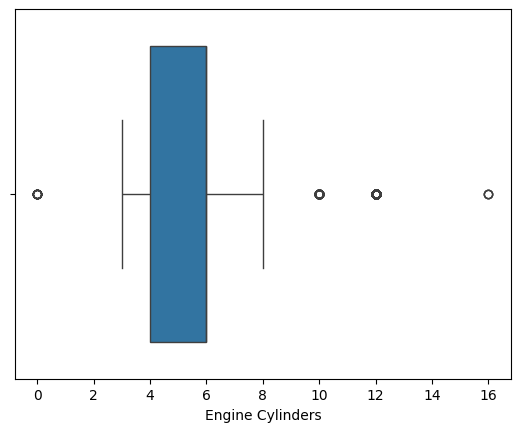

In [33]:
 sns.boxplot(x=df['Engine Cylinders'])

<Axes: xlabel='Engine HP'>

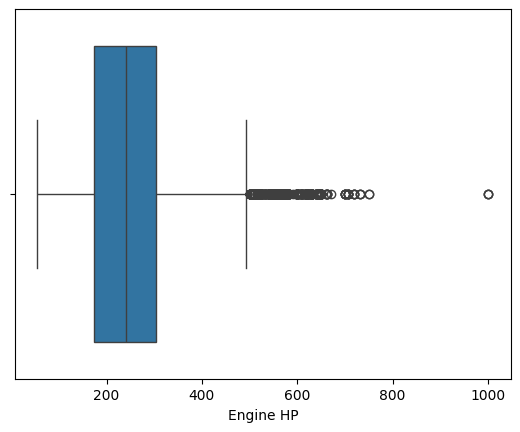

In [85]:
 sns.boxplot(x=df['Engine HP'])

<Axes: xlabel='highway MPG'>

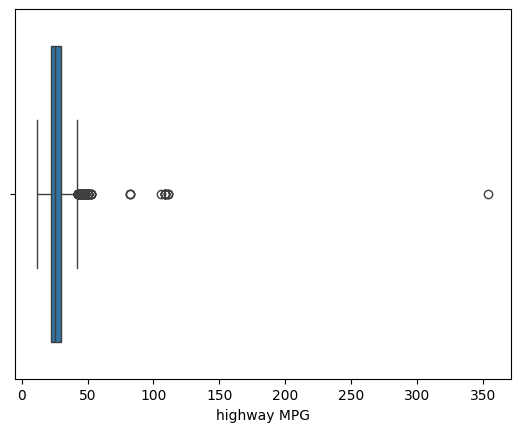

In [86]:
 sns.boxplot(x=df['highway MPG'])

In [87]:
data =df.drop (['Year'],axis=1)

In [88]:
q1=data.quantile(0.25)
q1

<ipython-input-88-891e26dacb4d>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data.quantile(0.25)


Engine HP             173.0
Engine Cylinders        4.0
highway MPG            22.0
city mpg               16.0
MSRP                21972.5
Name: 0.25, dtype: float64

In [89]:
q3=data.quantile(0.75)
q3

<ipython-input-89-fd98f18bd49f>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data.quantile(0.75)


Engine HP             303.0
Engine Cylinders        6.0
highway MPG            30.0
city mpg               22.0
MSRP                43300.0
Name: 0.75, dtype: float64

In [90]:
IQR = q3-q1
IQR

Engine HP             130.0
Engine Cylinders        2.0
highway MPG             8.0
city mpg                6.0
MSRP                21327.5
dtype: float64

Removing the data that is less than q1-1.5xIQR and greater than q3+1.5xIQR

In [91]:
df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).any(axis=1) ]

<ipython-input-91-411a1a170303>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).any(axis=1) ]


,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
135,BMW,3 Series,2015,180.0,4.0,AUTOMATIC,rear wheel drive,45,32,39000
140,BMW,3 Series,2015,180.0,4.0,AUTOMATIC,all wheel drive,43,31,43450
142,BMW,3 Series,2015,180.0,4.0,AUTOMATIC,all wheel drive,43,31,41000
146,BMW,3 Series,2016,180.0,4.0,AUTOMATIC,rear wheel drive,42,32,39850
161,BMW,3 Series,2017,180.0,4.0,AUTOMATIC,rear wheel drive,42,32,40250
...,...,...,...,...,...,...,...,...,...,...
11737,Cadillac,XLR,2009,320.0,8.0,AUTOMATIC,rear wheel drive,24,15,86215
11810,Toyota,Yaris iA,2017,106.0,4.0,AUTOMATIC,front wheel drive,40,32,17050
11903,BMW,Z8,2001,394.0,8.0,MANUAL,rear wheel drive,19,12,128000
11904,BMW,Z8,2002,394.0,8.0,MANUAL,rear wheel drive,19,12,130000


In [92]:
df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).any(axis=1) ].shape

<ipython-input-92-7c9a4d401a31>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).any(axis=1) ].shape


(1252, 10)

Removing outlier

In [94]:
df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).any(axis=1) ].shape

<ipython-input-94-9d0b331b1038>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).any(axis=1) ].shape


(9575, 10)

In [93]:
df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).any(axis=1) ]

<ipython-input-93-3f67bc598a0c>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).any(axis=1) ]


,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


### **Visualizing the features**

Text(0.5, 0, 'Make')

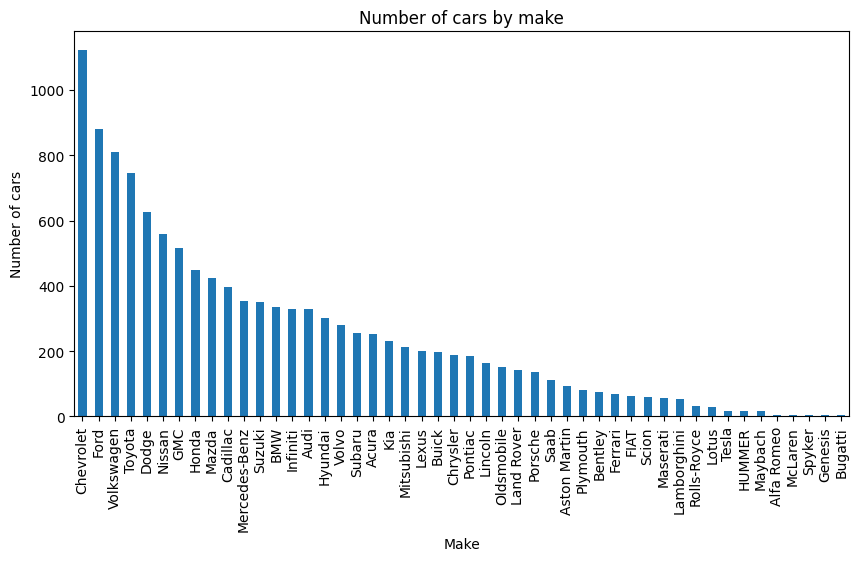

In [49]:
df.Make.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

USing scatter plot to identify the relationship between price and horsepower

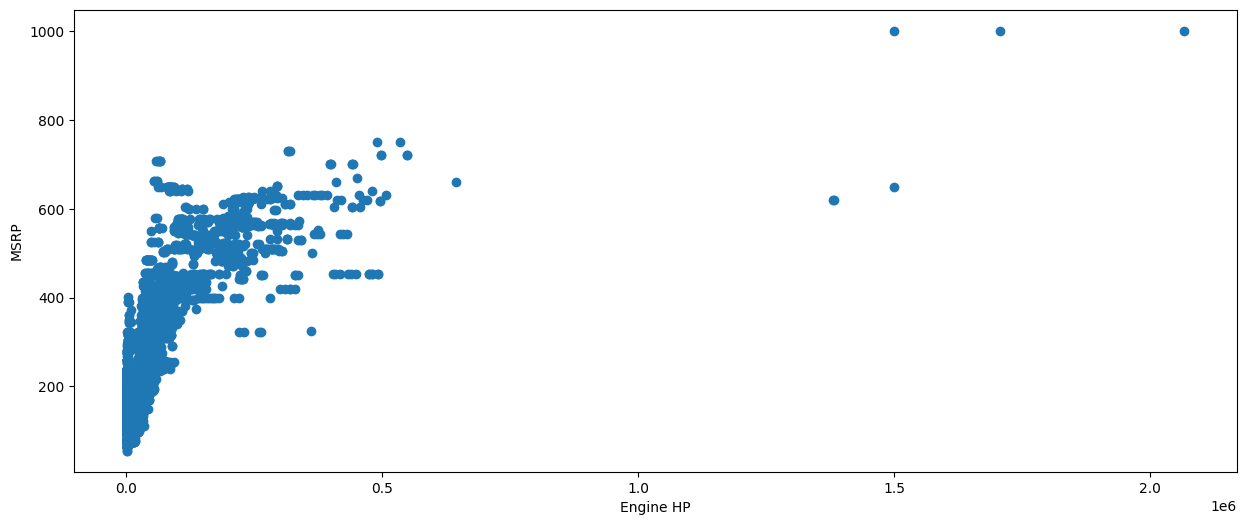

In [98]:
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter( x=df['MSRP'],y=df['Engine HP'])
ax.set_xlabel('Engine HP')
ax.set_ylabel('MSRP')
plt.show()